---
title: "30 Day Map Challenge 2024 - Day 3: Polygons"
categories:
  - Project
tags:
  - 30daymapchallenge
  - python
  - programming
classes: wide
header:
  teaser: /assets/images/30daymapchallenge2024-day3.png
---

For day four, the theme is _Hexagons_:

> Maps using hexagonal grids. Step away from square grids and try mapping with hexagons. A fun way to show density or spatial patterns.

### Data

The idea for today is building a heatmap that visualizes the tree-density in the city.
This does not include natural structures, like forests and parks.
Therefore, the map shows hardly any tree on the area of _Dresden Heath_, which is one of the largest municipal forests in Germany.

The OpenDataPortal gives the following explanation of the data set (translation by me):
> Dresden is a city rich in trees with a great diversity of species. 
> Avenues and valuable trees in the parks, green spaces and gardens characterise the cityscape.
> Trees make a significant contribution to the quality of life as they have a positive influence on the urban climate.
> There are currently around 98,700 registered trees in urban areas.
> These include street trees, trees in parks and green spaces, on playgrounds, on open spaces of educational institutions, along waterways of the 2nd order and on other municipal areas.
> 
> In addition to the widely represented typical tree species such as lime, maple and chestnut, over 139 species and varieties of ginkgo, magnolia, leather tree and other rarer tree species grow in the urban area.

<!-- For this, I will learn how to load GeoJson data from Dresden's OpenDataPortal.
Up until now, I've been downloading CSV files from the platform.
However, tree data is only available in GeoJson format.
When [following the link](https://kommisdd.dresden.de/net4/public/ogcapi/collections/L1261) in a browser, only metadata is returned.
So let's see, how we can get the full dataset of trees in the city. -->
[Data set](https://opendata.dresden.de/informationsportal/?open=1&result=8B5B50B7A6E746EB9DEB634A041F596E#app/mainpage)

## Implementation

### Imports

In [72]:
import geopandas as gpd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from utils import read_dresden_csv

### Data Retrieval

The link that is provided when selecting GeoJson data format look like this: https://kommisdd.dresden.de/net4/public/ogcapi/collections/L1261 .
After investigating the data that is returned from this link, I found that the actual data can be retrieved by appending `/items` to the link. 
Furthermore, the number of items to be returned can be limited using the `?limit=10` GET parameter. 
However, there is no possibility to set an offset for performing pagination. 
Therefore, I have to omit the limit and just request the full collection:

In [ ]:
response = requests.get("https://kommisdd.dresden.de/net4/public/ogcapi/collections/L1261/items")
data = json.loads(response.text)

With this, we get 116,751 records, i.e. tree locations, that can be loaded into a `GeoDataFrame`:

In [149]:
gdf = gpd.GeoDataFrame.from_features(data['features'])
gdf_city_boundary = read_dresden_csv("data/dresden/city_boundary.csv", geometry_column="shape")
gdf_streets = read_dresden_csv("data/dresden/verkehrswege.csv", geometry_column="shape")
gdf

,geometry,pnr,status,historie,se_anno_cad_data,aend
0,POINT (13.73355 51.04495),10358,0,AKT,None,05.03.2024 00:00:00
1,POINT (13.73344 51.04679),10359,5,AKT,None,05.03.2024 00:00:00
2,POINT (13.73356 51.04448),10360,0,AKT,None,05.03.2024 00:00:00
3,POINT (13.73256 51.0436),10361,0,AKT,None,05.03.2024 00:00:00
4,POINT (13.73173 51.04284),10362,0,AKT,None,05.03.2024 00:00:00
...,...,...,...,...,...,...
9628,POINT (13.73736 51.0435),20990,5,NEU,None,05.03.2024 00:00:00
9629,POINT (13.73752 51.04343),20996,5,NEU,None,05.03.2024 00:00:00
9630,POINT (13.73763 51.04338),20994,5,NEU,None,05.03.2024 00:00:00
9631,POINT (13.71236 51.09956),20992,5,NEU,None,05.03.2024 00:00:00


In [150]:
gdf[['longitude', 'latitude']] = gdf.get_coordinates()

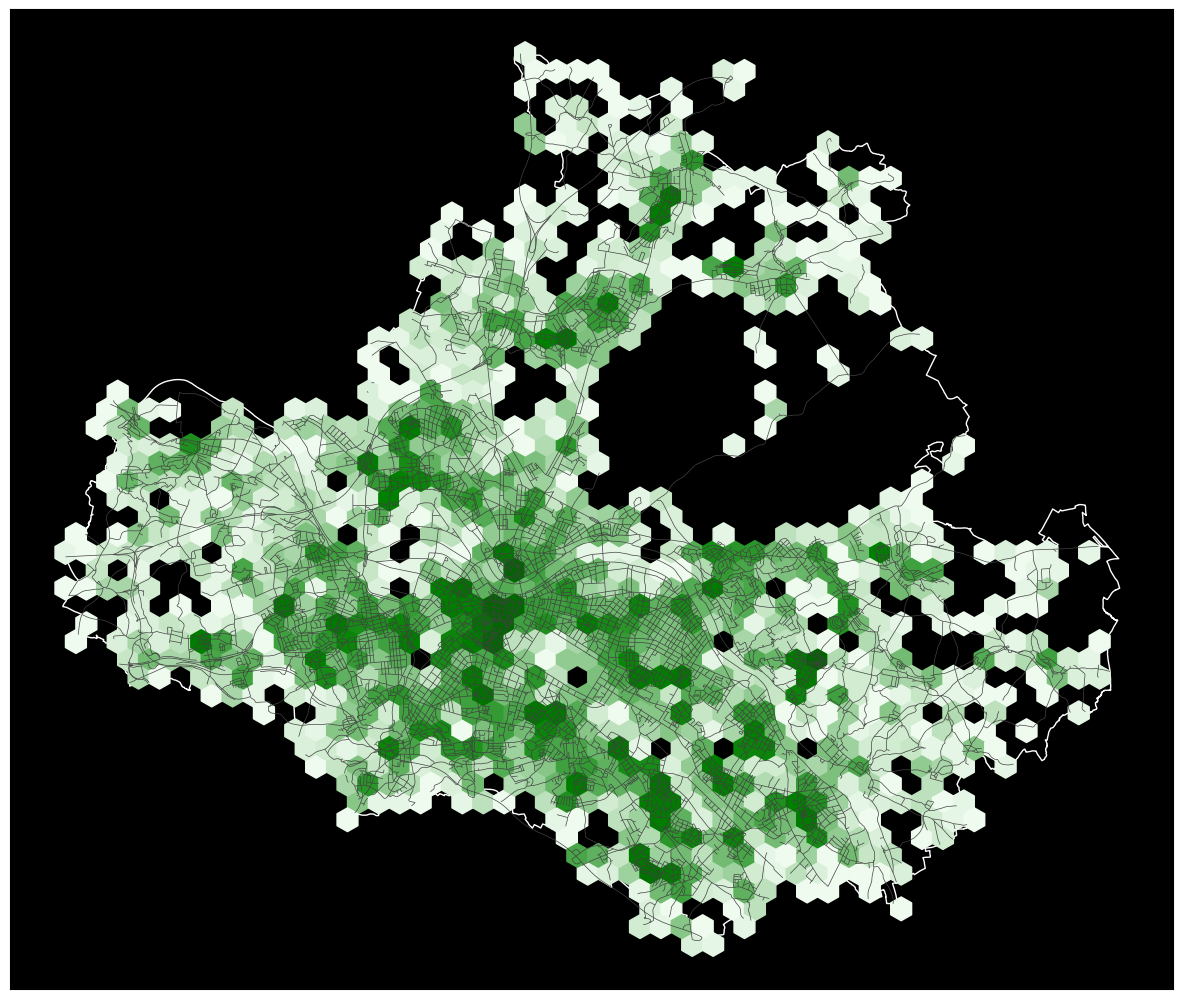

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
background_color = "#000000"
street_color = "#424242"
boundary_color = "white"
ax.set_facecolor(background_color)
# ax.set_aspect("equal")

gdf_city_boundary["shape"].plot(edgecolor=boundary_color, facecolor="none", ax=ax, zorder=1)
gdf_streets["shape"].plot(color=street_color, ax=ax, linewidth=.5, zorder=4)

cmap = clrs.LinearSegmentedColormap.from_list("", ["#effbef","green","darkgreen"])
cmap.set_under(alpha=0)

gridsize = 50
plt.hexbin(
    x=gdf['longitude'],
    y=gdf['latitude'],
    gridsize=(gridsize, gridsize//2),
    cmap=cmap,
    vmin=1,
    zorder=3
)

plt.xticks([])
plt.yticks([])

plt.show()

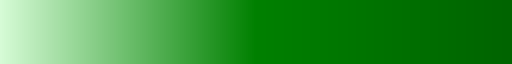

In [131]:
cmap